# **AI** **Prototype** **for** **Predicting** **Risky** **Pregnancies** #

### Importing necessary libraries for data analysis, preprocessing, model training, and evaluation. ###

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, make_scorer, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, cross_validate
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

### Laying the Foundation: Data Exploration and Preprocessing. ###


>This section focuses on exploring the dataset to understand its characteristics and identify potential patterns.

Key steps:

*   **Descriptive statistics:** Calculating summary statistics for numerical features.
*   **Data visualization:** Creating visualizations to explore data distributions, relationships between variables, and potential outliers.


*   **Correlation analysis:** Examining the correlation between features to identify potential multicollinearity.








In [4]:
# Reading the data from the CSV format file  and previewing the data
df = pd.read_csv(r'C:\Users\leela\OneDrive\Documents\Course_work\AAI\Leela_Raju_34055773_AI_Prototype_for_predicting_risky_pregnancies\Maternal Health Risk Data Set.csv')

print("Dataset preview:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset preview:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
N

In [5]:
# Checking for missing values, duplicated and removing duplicated values
print("Missing values in each column:")
print(df.isnull().sum())

print("\nDuplicate rows in the dataset:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
print("\nDataset shape after removing duplicates:", df.shape)

Missing values in each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Duplicate rows in the dataset:
562

Dataset shape after removing duplicates: (452, 7)


Class distribution of RiskLevel:
RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64


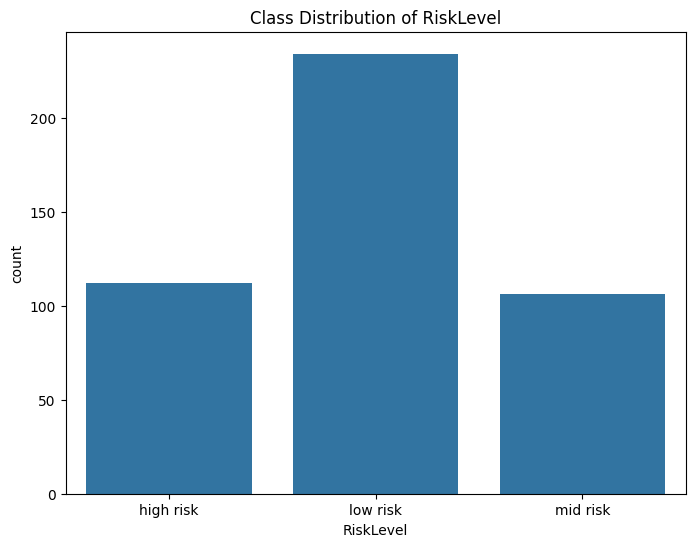

C:\Users\leela\AppData\Local\Temp\ipykernel_12928\1745923732.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RiskLevel'] = df['RiskLevel'].replace(risk_mapping)


In [6]:
# Checking class distribution of RiskLevel and encoding the Risklevel as it is categorical
print("Class distribution of RiskLevel:")
print(df['RiskLevel'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='RiskLevel', data=df)
plt.title('Class Distribution of RiskLevel')
plt.show()

risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel'] = df['RiskLevel'].replace(risk_mapping)

Summary statistics for numerical columns:
              Age  SystolicBP  DiastolicBP          BS    BodyTemp  \
count  452.000000  452.000000   452.000000  452.000000  452.000000   
mean    29.194690  110.553097    75.418142    8.346173   98.692478   
std     13.767379   17.872282    13.754578    2.829209    1.410897   
min     10.000000   70.000000    49.000000    6.000000   98.000000   
25%     19.000000   90.000000    65.000000    6.900000   98.000000   
50%     25.000000  120.000000    80.000000    7.500000   98.000000   
75%     35.000000  120.000000    86.000000    7.900000   98.000000   
max     70.000000  160.000000   100.000000   19.000000  103.000000   

        HeartRate   RiskLevel  
count  452.000000  452.000000  
mean    73.949115    0.730088  
std      8.156973    0.833169  
min      7.000000    0.000000  
25%     70.000000    0.000000  
50%     76.000000    0.000000  
75%     80.000000    1.000000  
max     90.000000    2.000000  

Correlation matrix for numerical colum

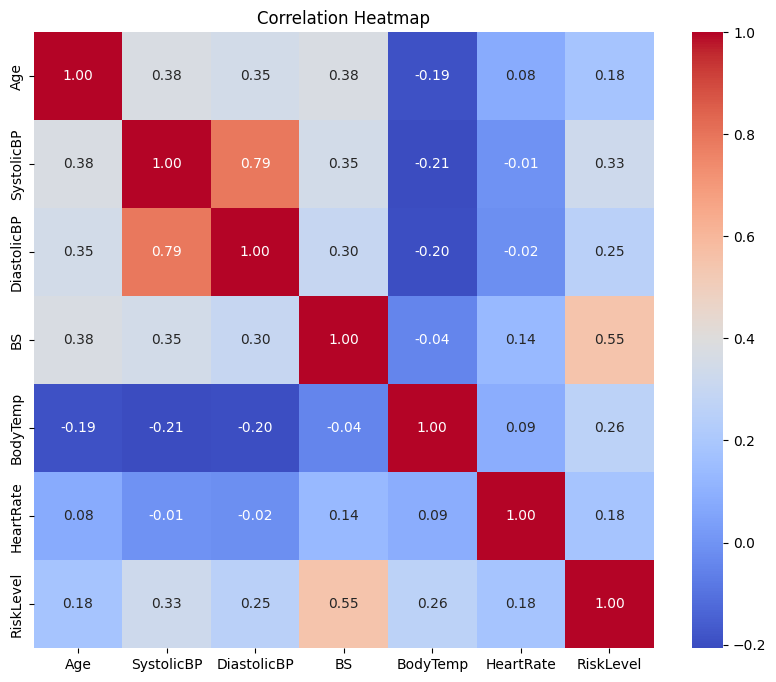

In [7]:
#  Summary statistics and correlation heatmap
print("Summary statistics for numerical columns:")
print(df.describe())

num_df = df.select_dtypes(include=[np.number])
print("\nCorrelation matrix for numerical columns:")
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

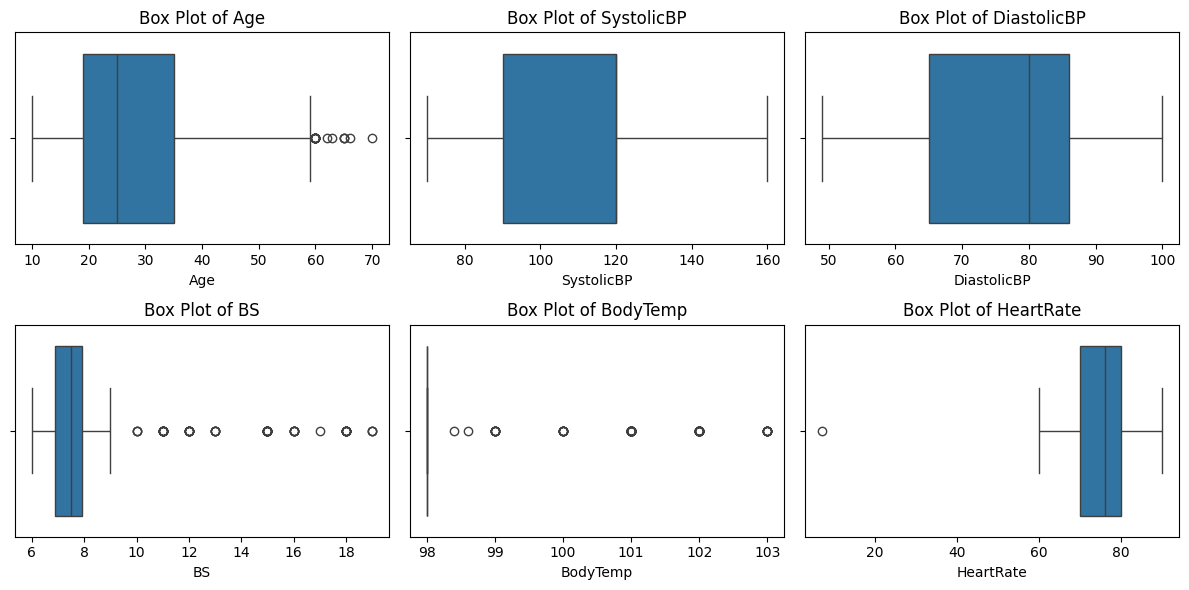

In [8]:
# Using Boxplot to detect Outliers (not removing any outliers as they might be important)
num_col = df.select_dtypes(include=[np.number]).columns
num_col = num_col.drop('RiskLevel')

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [9]:
# Heartrate of 7 is not biologically plausible, printing the row line and then changing the value to 70
print(df[df['HeartRate'] < 60])
df.loc[df['HeartRate'] < 60, 'HeartRate'] = 70

     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate  RiskLevel
499   16         120           75  7.9      98.0          7          0


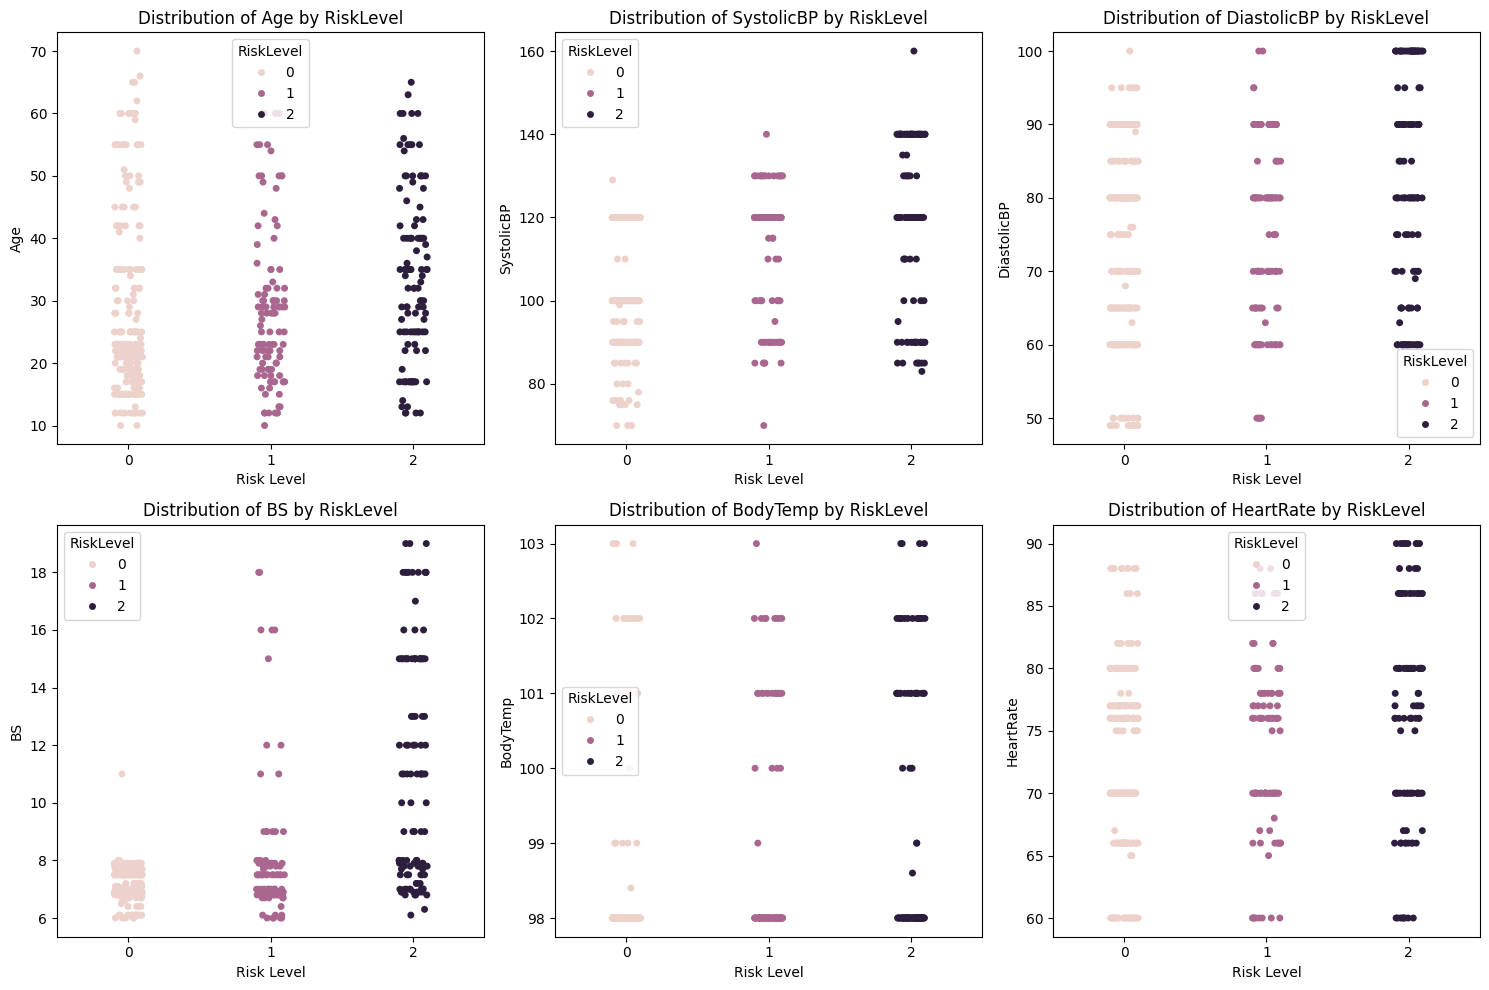

In [10]:
num_col = df.select_dtypes(include=[np.number]).columns
num_col = num_col.drop('RiskLevel')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(num_col):
    row = i // 3
    col = i % 3
    sns.stripplot(x='RiskLevel', y=feature, data=df, hue='RiskLevel', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by RiskLevel')
    axes[i].set_xlabel('Risk Level')
    axes[i].set_ylabel(feature)
plt.tight_layout()
plt.show()

In [11]:
#Adding and testing new feature importance
df['BP_Ratio'] = df['SystolicBP'] / df['DiastolicBP']
df['Pulse_Pressure'] = df['SystolicBP'] - df['DiastolicBP']

print(df.head())

X = df.drop(columns=['RiskLevel'])  # Features
y = df['RiskLevel']  # Target

# Train a simple Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86          2   
1   35         140           90  13.0      98.0         70          2   
2   29          90           70   8.0     100.0         80          2   
3   30         140           85   7.0      98.0         70          2   
4   35         120           60   6.1      98.0         76          0   

   BP_Ratio  Pulse_Pressure  
0  1.625000              50  
1  1.555556              50  
2  1.285714              20  
3  1.647059              55  
4  2.000000              60  
BS                0.343373
Age               0.139810
SystolicBP        0.130894
HeartRate         0.090043
DiastolicBP       0.085938
BodyTemp          0.072427
Pulse_Pressure    0.069656
BP_Ratio          0.067859
dtype: float64


In [12]:
# Removing new featue as it is not showing importance
df.drop(columns=['BP_Ratio', 'Pulse_Pressure'], inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


### Splitting the dataset into training(75%) and testing data(25%)

In [13]:
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) #  Data is split into 75% training and 25% testing

print('Class distribution before SMOTE:', Counter(y_train)) # Checking for class distribution before applying SMOTE or any other synthetic data generation method

Class distribution before SMOTE: Counter({0: 175, 2: 84, 1: 80})


###  Comparing Scaling Techniques with Logistic Regression Algorithm

In [14]:
# Function to create and evaluate a pipeline
def evaluate_pipeline(scaler):
    # Create a pipeline with the given scaler, SMOTE, and the classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(random_state=42))
    ])

    # Evaluate using cross-validation on the training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')
    print(f"Cross-validation F1 Macro scores with {scaler.__class__.__name__}: {cv_scores}")
    print(f"Mean F1 Macro: {cv_scores.mean():.4f}")

    # Fit the pipeline and evaluate on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\nClassification Report for {scaler.__class__.__name__} on Test Set:\n")
    print(classification_report(y_test, y_pred))

# Evaluate with StandardScaler
print("----- Evaluation with StandardScaler -----")
evaluate_pipeline(StandardScaler())

# Evaluate with RobustScaler
print("\n----- Evaluation with RobustScaler -----")
evaluate_pipeline(RobustScaler())

----- Evaluation with StandardScaler -----
Cross-validation F1 Macro scores with StandardScaler: [0.51201201 0.49188464 0.52443352 0.52131964 0.62733269]
Mean F1 Macro: 0.5354

Classification Report for StandardScaler on Test Set:

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        59
           1       0.29      0.38      0.33        26
           2       0.64      0.64      0.64        28

    accuracy                           0.59       113
   macro avg       0.57      0.56      0.56       113
weighted avg       0.63      0.59      0.61       113


----- Evaluation with RobustScaler -----
Cross-validation F1 Macro scores with RobustScaler: [0.54111254 0.49188464 0.50247574 0.53841366 0.61108039]
Mean F1 Macro: 0.5370

Classification Report for RobustScaler on Test Set:

              precision    recall  f1-score   support

           0       0.76      0.64      0.70        59
           1       0.26      0.35      0.30        

### Create a Pipeline and Evaluate Different Model Performances

In [15]:
# Using StandardScaler as it shows more increased accuracy and precision compared to RobustScaler.

#Defining the models ( initial Hyperparameters)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost Classifier': XGBClassifier(n_estimators=100, random_state=42)
}

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

scoring = ['accuracy', 'balanced_accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    cv_results = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring, n_jobs=-1, return_train_score=True)

    results[model_name] = {
        'Train Accuracy': round(cv_results['train_accuracy'].mean(),4),
        'Test Accuracy': round(cv_results['test_accuracy'].mean(), 4),
        'Train Balanced Accuracy': round(cv_results['train_balanced_accuracy'].mean(), 4),
        'Test Balanced Accuracy': round(cv_results['test_balanced_accuracy'].mean(), 4),
        'Train Precision': round(cv_results['train_precision_macro'].mean(), 4),
        'Test Precision': round(cv_results['test_precision_macro'].mean(), 4),
        'Train Recall': round(cv_results['train_recall_macro'].mean(), 4),
        'Test Recall': round(cv_results['test_recall_macro'].mean(), 4),
        'Train F1 Score': round(cv_results['train_f1_macro'].mean(), 4),
        'Test F1 Score': round(cv_results['test_f1_macro'].mean(), 4)
    }

# Display results
pd.DataFrame(results).T.sort_values(by='Test F1 Score', ascending=False)


,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
Support Vector Machine,0.7412,0.6343,0.6987,0.5815,0.7023,0.5743,0.6987,0.5815,0.6944,0.5730
K Nearest Neighbors,0.7559,0.5812,0.7521,0.5466,0.7427,0.5620,0.7521,0.5466,0.7433,0.5473
Random Forest Classifier,0.9491,0.6047,0.9405,0.5488,0.9480,0.5539,0.9405,0.5488,0.9438,0.5466
XGBoost Classifier,0.9491,0.5841,0.9364,0.5421,0.9524,0.5408,0.9364,0.5421,0.9430,0.5385
Logistic Regression,0.6143,0.5755,0.5822,0.5368,0.5744,0.5367,0.5822,0.5368,0.5765,0.5282


### Tuning Random Forest Classifier and XGBoost

In [16]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ---------------- RANDOM FOREST ----------------
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    rf_pipe,
    rf_param_grid,
    n_iter=10,
    cv=skf,
    scoring='f1_macro',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X, y) # Folds during StratifiedKfold (not applied on whole dataset)

# ---------------- XGBOOST ----------------
xgb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

xgb_param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    xgb_pipe,
    xgb_param_grid,
    n_iter=10,
    cv=skf,
    scoring='f1_macro',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X, y) # Folds during StratifiedKfold (not applied on whole dataset)

print("Random Forest Best Params:")
print(rf_search.best_params_)
print("Best F1 Score:", round(rf_search.best_score_, 4))

print("\nXGBoost Best Params:")
print(xgb_search.best_params_)
print("Best F1 Score:", round(xgb_search.best_score_, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\leela\OneDrive\Documents\Course_work\AAI\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Best Params:
{'smote__k_neighbors': 3, 'model__n_estimators': 200, 'model__min_samples_leaf': 1, 'model__max_depth': 5}
Best F1 Score: 0.6459

XGBoost Best Params:
{'smote__k_neighbors': 5, 'model__subsample': 0.6, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best F1 Score: 0.64


In [17]:
# Get the best model from search
best_rf_model = rf_search.best_estimator_
best_xgb_model = xgb_search.best_estimator_

# Fit the model
best_rf_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)

def compute_metrics(model_name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'Train Accuracy': round(accuracy_score(y_train, y_train_pred), 4),
        'Test Accuracy': round(accuracy_score(y_test, y_test_pred), 4),
        'Train Balanced Accuracy': round(balanced_accuracy_score(y_train, y_train_pred), 4),
        'Test Balanced Accuracy': round(balanced_accuracy_score(y_test, y_test_pred), 4),
        'Train Precision': round(precision_score(y_train, y_train_pred, average='macro'), 4),
        'Test Precision': round(precision_score(y_test, y_test_pred, average='macro'), 4),
        'Train Recall': round(recall_score(y_train, y_train_pred, average='macro'), 4),
        'Test Recall': round(recall_score(y_test, y_test_pred, average='macro'), 4),
        'Train F1 Score': round(f1_score(y_train, y_train_pred, average='macro'), 4),
        'Test F1 Score': round(f1_score(y_test, y_test_pred, average='macro'), 4)
    }

# Collect metrics
rf_metrics = compute_metrics('Random Forest', best_rf_model, X_train, y_train, X_test, y_test)
xgb_metrics = compute_metrics('XGBoost', best_xgb_model, X_train, y_train, X_test, y_test)

# Show results
results = {
      'Random Forest': rf_metrics,
      'XGBoost': xgb_metrics
  }

pd.DataFrame(results).T.sort_values(by='Test F1 Score', ascending=False)

c:\Users\leela\OneDrive\Documents\Course_work\AAI\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
XGBoost,0.7522,0.7788,0.7033,0.7056,0.7234,0.7310,0.7033,0.7056,0.7098,0.7100
Random Forest,0.7788,0.7522,0.7357,0.6815,0.7585,0.6957,0.7357,0.6815,0.7433,0.6795


### Tuning Logistic Regression, SVM and KNN

In [18]:
# Model setups
models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000, random_state=42),
        {
            'model__C': [0.01, 0.1, 1, 10],
            'model__penalty': ['l2']
        }
    ),
    'SVM': (
        SVC(probability=True, random_state=42),
        {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    ),
    'KNN': (
        KNeighborsClassifier(),
        {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    )
}

# Store results
final_results = []

for name, (clf, param_grid) in models.items():
    print(f"Tuning {name}...")
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', clf)
    ])

    grid = GridSearchCV(
        pipe, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    final_results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Train Accuracy': round(accuracy_score(y_train, y_train_pred), 4),
        'Test Accuracy': round(accuracy_score(y_test, y_test_pred), 4),
        'Train Balanced Accuracy': round(balanced_accuracy_score(y_train, y_train_pred), 4),
        'Test Balanced Accuracy': round(balanced_accuracy_score(y_test, y_test_pred), 4),
        'Train Precision': round(precision_score(y_train, y_train_pred, average='macro'), 4),
        'Test Precision': round(precision_score(y_test, y_test_pred, average='macro'), 4),
        'Train Recall': round(recall_score(y_train, y_train_pred, average='macro'), 4),
        'Test Recall': round(recall_score(y_test, y_test_pred, average='macro'), 4),
        'Train F1 Score': round(f1_score(y_train, y_train_pred, average='macro'), 4),
        'Test F1 Score': round(f1_score(y_test, y_test_pred, average='macro'), 4),
    })

# Display
pd.DataFrame(final_results)

Tuning Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning KNN...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


,Model,Best Params,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,"{'model__C': 0.01, 'model__penalty': 'l2'}",0.6490,0.6460,0.5834,0.6173,0.5691,0.6181,0.5834,0.6173,0.5717,0.6163
1,SVM,"{'model__C': 1, 'model__kernel': 'rbf'}",0.7257,0.6372,0.6897,0.6018,0.6797,0.5932,0.6897,0.6018,0.6815,0.5970
2,KNN,"{'model__metric': 'manhattan', 'model__n_neigh...",0.7345,0.6195,0.7040,0.5708,0.7086,0.5817,0.7040,0.5708,0.7059,0.5759


### Displaying the results for all models after tuning

In [19]:
tuned_results = []

# Add results for Random Forest
tuned_results.append({
    'Model': 'Random Forest',
    'Train Accuracy': rf_metrics['Train Accuracy'],
    'Test Accuracy': rf_metrics['Test Accuracy'],
    'Train Balanced Accuracy': rf_metrics['Train Balanced Accuracy'],
    'Test Balanced Accuracy': rf_metrics['Test Balanced Accuracy'],
    'Train Precision': rf_metrics['Train Precision'],
    'Test Precision': rf_metrics['Test Precision'],
    'Train Recall': rf_metrics['Train Recall'],
    'Test Recall': rf_metrics['Test Recall'],
    'Train F1 Score': rf_metrics['Train F1 Score'],
    'Test F1 Score': rf_metrics['Test F1 Score']
})

# Add results for XGBoost
tuned_results.append({
    'Model': 'XGBoost',
    'Train Accuracy': xgb_metrics['Train Accuracy'],
    'Test Accuracy': xgb_metrics['Test Accuracy'],
    'Train Balanced Accuracy': xgb_metrics['Train Balanced Accuracy'],
    'Test Balanced Accuracy': xgb_metrics['Test Balanced Accuracy'],
    'Train Precision': xgb_metrics['Train Precision'],
    'Test Precision': xgb_metrics['Test Precision'],
    'Train Recall': xgb_metrics['Train Recall'],
    'Test Recall': xgb_metrics['Test Recall'],
    'Train F1 Score': xgb_metrics['Train F1 Score'],
    'Test F1 Score': xgb_metrics['Test F1 Score']
})


# Append results from other models (Logistic Regression, SVM, KNN)
for result in final_results:
    tuned_results.append({
        'Model': result['Model'],
        'Train Accuracy': result['Train Accuracy'],
        'Test Accuracy': result['Test Accuracy'],
        'Train Balanced Accuracy': result['Train Balanced Accuracy'],
        'Test Balanced Accuracy': result['Test Balanced Accuracy'],
        'Train Precision': result['Train Precision'],
        'Test Precision': result['Test Precision'],
        'Train Recall': result['Train Recall'],
        'Test Recall': result['Test Recall'],
        'Train F1 Score': result['Train F1 Score'],
        'Test F1 Score': result['Test F1 Score']
    })


tuned_df = pd.DataFrame(tuned_results)
tuned_df.sort_values(by='Test F1 Score', ascending=False)

,Model,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
1,XGBoost,0.7522,0.7788,0.7033,0.7056,0.7234,0.7310,0.7033,0.7056,0.7098,0.7100
0,Random Forest,0.7788,0.7522,0.7357,0.6815,0.7585,0.6957,0.7357,0.6815,0.7433,0.6795
2,Logistic Regression,0.6490,0.6460,0.5834,0.6173,0.5691,0.6181,0.5834,0.6173,0.5717,0.6163
3,SVM,0.7257,0.6372,0.6897,0.6018,0.6797,0.5932,0.6897,0.6018,0.6815,0.5970
4,KNN,0.7345,0.6195,0.7040,0.5708,0.7086,0.5817,0.7040,0.5708,0.7059,0.5759


### XGBoost Classification Report on Test set

In [20]:
xgb_test_pred = best_xgb_model.predict(X_test)
xgb_test_pred_proba = best_xgb_model.predict_proba(X_test)

print("Classification Report for XGBoost on Test Set:\n")
target_names = ['Low Risk', 'Mid Risk', 'High Risk']
print(classification_report(y_test, xgb_test_pred, target_names=target_names))

Classification Report for XGBoost on Test Set:

              precision    recall  f1-score   support

    Low Risk       0.81      0.95      0.88        59
    Mid Risk       0.53      0.35      0.42        26
   High Risk       0.85      0.82      0.84        28

    accuracy                           0.78       113
   macro avg       0.73      0.71      0.71       113
weighted avg       0.76      0.78      0.76       113



### Training XGBoost Model without Pipeline and with adding class weights

In [31]:
# Scale and SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)

# Compute sample weights after resampling
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

xgb_params_clean = {
    key.split('__')[-1]: val
    for key, val in xgb_search.best_params_.items()
    if key.startswith('model__')
}

# Train XGBoost directly (not in pipeline)
xgb_clf = XGBClassifier(
    **xgb_params_clean,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_clf.fit(X_resampled, y_resampled, sample_weight=sample_weights)

# Evaluate on test set
X_test_scaled = scaler.transform(X_test)
y_pred_weighted = xgb_clf.predict(X_test_scaled)

# Show class-wise results
print("Classification Report (XGBoost with class weights):")
print(classification_report(y_test, y_pred_weighted, target_names=target_names))

# Save the model
from joblib import dump
dump(xgb_clf, 'xgboost_model.joblib')
print("Model saved as xgboost_model.joblib")
dump(scaler, 'scaler.joblib')
print("Scaler saved as scaler.joblib")

c:\Users\leela\OneDrive\Documents\Course_work\AAI\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:57:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost with class weights):
              precision    recall  f1-score   support

    Low Risk       0.81      0.95      0.88        59
    Mid Risk       0.53      0.35      0.42        26
   High Risk       0.85      0.82      0.84        28

    accuracy                           0.78       113
   macro avg       0.73      0.71      0.71       113
weighted avg       0.76      0.78      0.76       113

Model saved as xgboost_model.joblib
Scaler saved as scaler.joblib


### ROC Curve

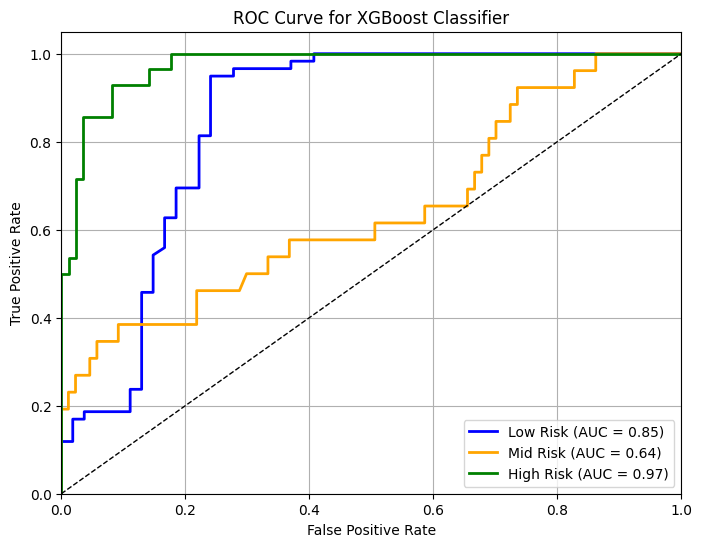

In [22]:
# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = xgb_clf.predict_proba(X_test_scaled)

# Compute ROC and AUC per class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']
class_names = ['Low Risk', 'Mid Risk', 'High Risk']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Printing misclassified mid-risk samples

In [23]:
# Convert predictions and labels to Series for easy handling
y_test_series = pd.Series(y_test, index=X_test.index)
y_pred_series = pd.Series(y_pred_weighted, index=X_test.index)

# Filter mid-risk samples that were misclassified
misclassified_mid = X_test[(y_test_series == 1) & (y_pred_series != 1)].copy()
misclassified_mid['True_Label'] = y_test_series[(y_test_series == 1) & (y_pred_series != 1)]
misclassified_mid['Predicted_Label'] = y_pred_series[(y_test_series == 1) & (y_pred_series != 1)]

print(f"🔍 {len(misclassified_mid)} mid-risk samples misclassified:\n")
misclassified_mid.head()

🔍 17 mid-risk samples misclassified:



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,True_Label,Predicted_Label
100,55,120,90,6.8,98.0,66,1,0
424,25,120,100,6.8,98.0,60,1,0
643,39,110,70,7.9,98.0,80,1,0
8,32,120,90,6.9,98.0,70,1,0
88,19,120,75,6.9,98.0,66,1,0


### Visualizing Feature Distributions for Mid-Risk Samples

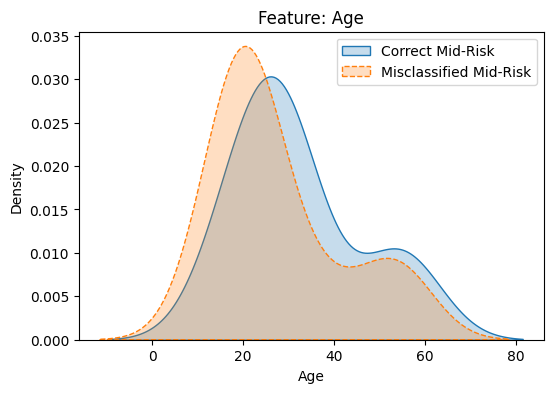

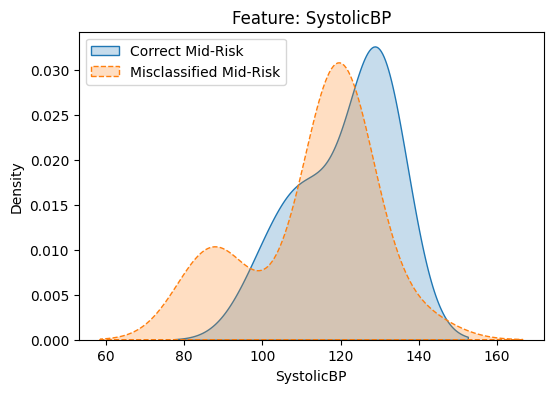

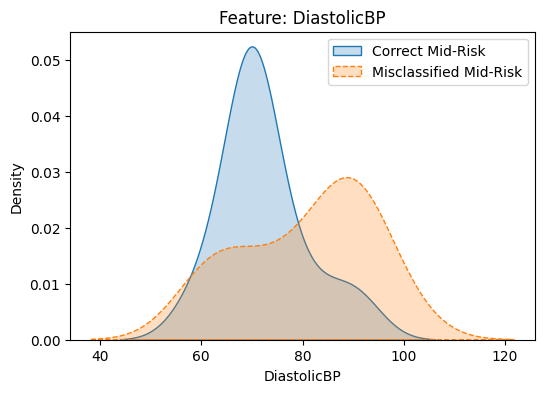

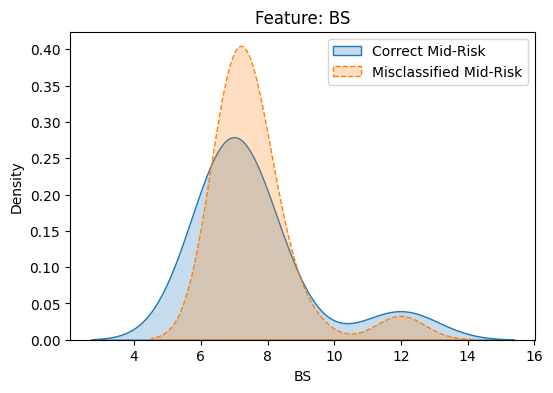

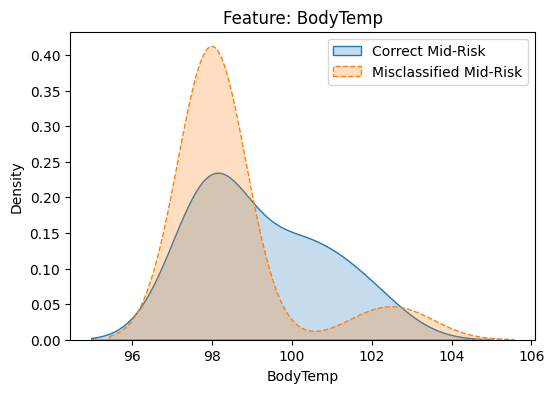

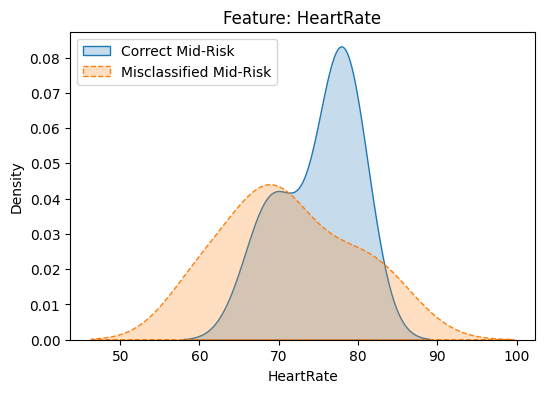

In [24]:
# Get correctly classified mid-risk samples
correct_mid = X_test[(y_test_series == 1) & (y_pred_series == 1)]

features = misclassified_mid.columns.drop(['True_Label', 'Predicted_Label'])

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(correct_mid[feature], label='Correct Mid-Risk', fill=True)
    sns.kdeplot(misclassified_mid[feature], label='Misclassified Mid-Risk', fill=True, linestyle='--')
    plt.title(f"Feature: {feature}")
    plt.legend()
    plt.show()

### Threshold Tuning for Mid-Risk Classification

In [25]:
# Get predicted probabilities
proba = xgb_clf.predict_proba(X_test_scaled)

# Thresholds from 0.2 to 0.6 in steps of 0.05
thresholds = np.arange(0.2, 0.61, 0.05)
scores = []

for t in thresholds:
    tuned_preds = []
    for i in range(len(proba)):
        if proba[i][1] >= t:
            tuned_preds.append(1)
        else:
            tuned_preds.append(np.argmax(proba[i]))

    report = classification_report(y_test, tuned_preds, output_dict=True)
    scores.append({
        'Threshold': round(t, 2),
        'Mid Risk Recall': report['1']['recall'],
        'Mid Risk Precision': report['1']['precision'],
        'Mid Risk F1': report['1']['f1-score'],
        'Macro F1': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(scores)

# Display as a table
threshold_df.sort_values(by='Mid Risk F1', ascending=False).reset_index(drop=True)

c:\Users\leela\OneDrive\Documents\Course_work\AAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leela\OneDrive\Documents\Course_work\AAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leela\OneDrive\Documents\Course_work\AAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,Threshold,Mid Risk Recall,Mid Risk Precision,Mid Risk F1,Macro F1,Accuracy
0,0.25,0.923077,0.272727,0.421053,0.442434,0.415929
1,0.60,0.346154,0.529412,0.418605,0.709989,0.778761
2,0.55,0.346154,0.529412,0.418605,0.709989,0.778761
3,0.50,0.346154,0.529412,0.418605,0.709989,0.778761
4,0.45,0.346154,0.529412,0.418605,0.709989,0.778761
5,0.35,0.538462,0.318182,0.400000,0.633333,0.628319
6,0.20,0.923077,0.252632,0.396694,0.364115,0.353982
7,0.40,0.384615,0.400000,0.392157,0.677806,0.725664
8,0.30,0.615385,0.250000,0.355556,0.530606,0.486726


### Visualizing Threshold Tuning Results

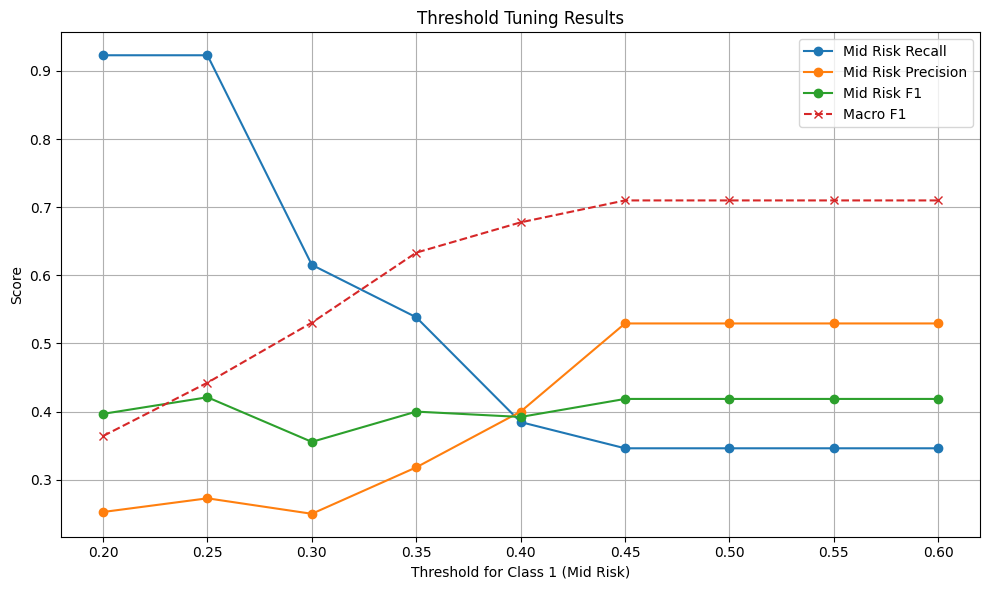

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['Mid Risk Recall'], label='Mid Risk Recall', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Mid Risk Precision'], label='Mid Risk Precision', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Mid Risk F1'], label='Mid Risk F1', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Macro F1'], label='Macro F1', linestyle='--', marker='x')
plt.xlabel("Threshold for Class 1 (Mid Risk)")
plt.ylabel("Score")
plt.title("Threshold Tuning Results")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Applying Custom Threshold for Mid-Risk Prediction

In [27]:
# Apply custom threshold logic (0.6 for mid-risk)
def predict_with_custom_threshold(prob, threshold=0.6):
    if prob[1] >= threshold:
        return 1  # Force mid-risk
    return np.argmax(prob)

# Get predictions
custom_preds = [predict_with_custom_threshold(p, threshold=0.6) for p in proba]

### Evaluating Performance with Custom Threshold

📊 Classification Report (Custom Threshold 0.6 for Mid-Risk):

              precision    recall  f1-score   support

    Low Risk       0.81      0.95      0.88        59
    Mid Risk       0.53      0.35      0.42        26
   High Risk       0.85      0.82      0.84        28

    accuracy                           0.78       113
   macro avg       0.73      0.71      0.71       113
weighted avg       0.76      0.78      0.76       113



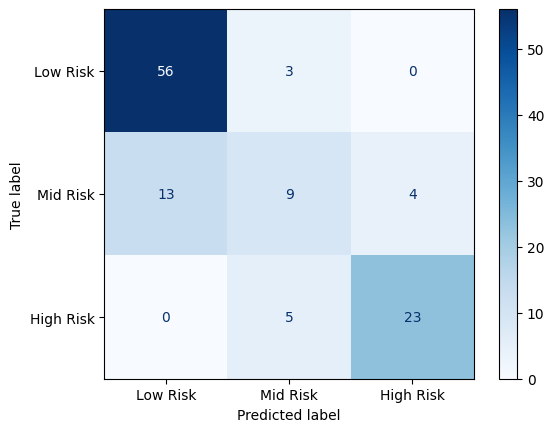

In [28]:
# Evaluate
print("📊 Classification Report (Custom Threshold 0.6 for Mid-Risk):\n")
print(classification_report(y_test, custom_preds, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, custom_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')

In [29]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


### SHAP Analysis for Feature Importance

Reshaped SHAP values: (3, 113, 6)
🔍 SHAP Summary for Class 0 (Low Risk)


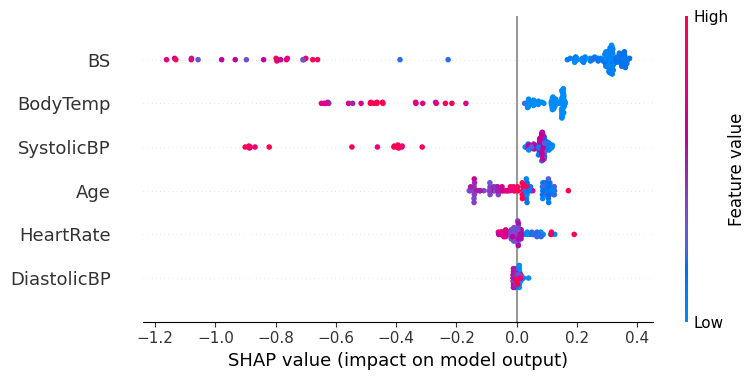

🔍 SHAP Summary for Class 1 (Mid Risk)


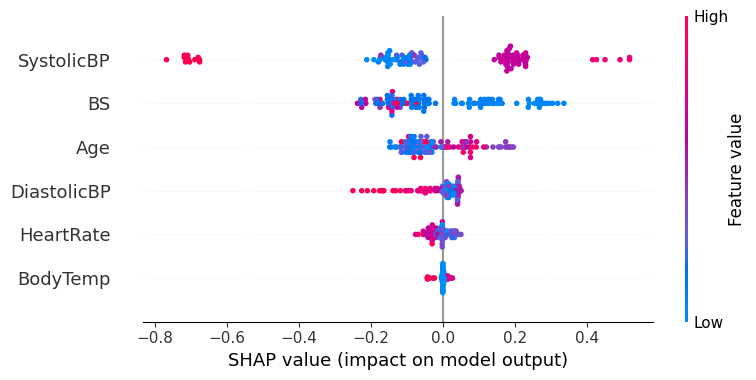

🔍 SHAP Summary for Class 2 (High Risk)


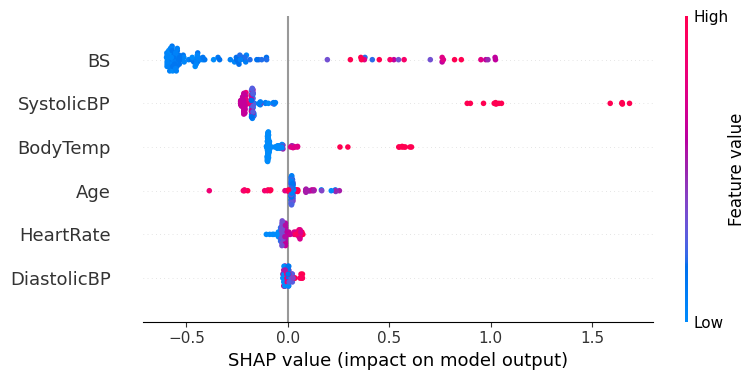

In [30]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer with your trained XGBoost model
explainer = shap.Explainer(xgb_clf)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Convert to DataFrame for easier handling with SHAP
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Access the values attribute of the Explanation object
shap_values = shap_values.values

reshaped_shap_values = np.moveaxis(shap_values, -1, 0)
print("Reshaped SHAP values:", reshaped_shap_values.shape)

class_labels = ['Low Risk', 'Mid Risk', 'High Risk']

for i in range(3):
    print(f"🔍 SHAP Summary for Class {i} ({class_labels[i]})")
    shap.summary_plot(
        reshaped_shap_values[i],
        X_test_scaled_df,
        feature_names=features,
        plot_type='dot'
    )